## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [2]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

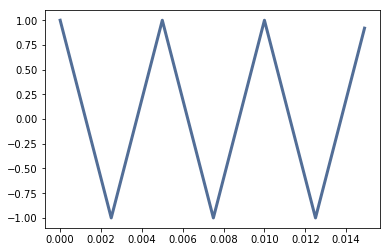

In [3]:
signal = thinkdsp.TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()

Make a wave and play it.

In [4]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

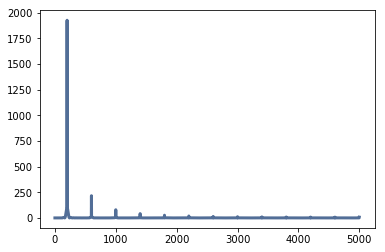

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot()

Make a square signal and plot a 3 period segment.

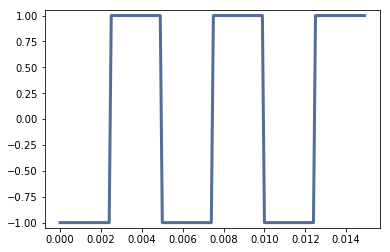

In [6]:
signal = thinkdsp.SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend=False)

Make a wave and play it.

In [7]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.normalize()
wave.make_audio()

Compute its spectrum and plot it.

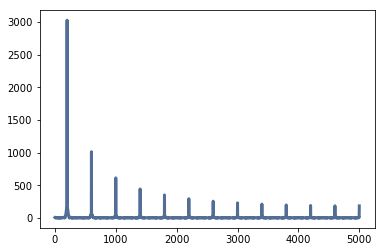

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot()

Create a sawtooth signal and plot a 3 period segment.

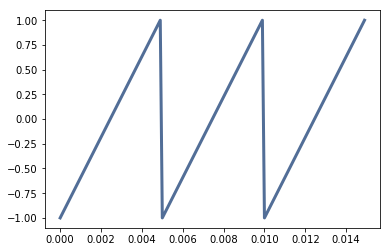

In [9]:
signal = thinkdsp.SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()

Make a wave and play it.

In [10]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

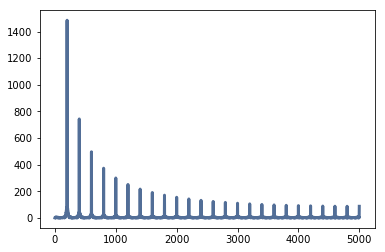

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot()

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

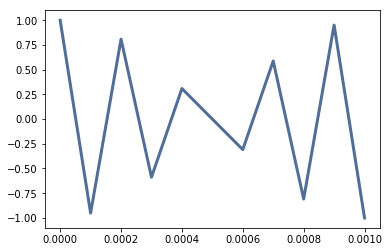

In [12]:
framerate = 10000

signal = thinkdsp.CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

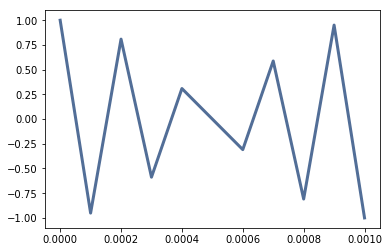

In [13]:
signal = thinkdsp.CosSignal(5500)
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

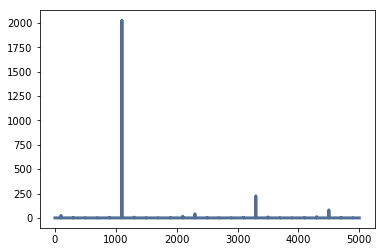

In [14]:
signal = thinkdsp.TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()

Here is a mathematical proof of the aliasing (folding) theory

## Amplitude and phase

Make a sawtooth wave.

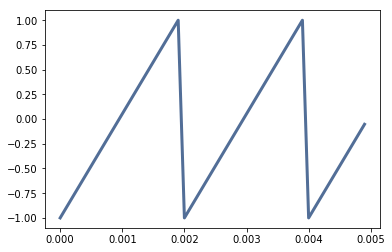

In [15]:
signal = thinkdsp.SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()

Play it.

In [16]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [17]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([  5.11590770e-13 +0.00000000e+00j,
         2.08859166e-13 -1.23636776e-13j,
        -2.05740131e-13 -7.78818538e-14j, ...,
         4.16391084e-13 +2.01961326e-14j,
        -5.60510133e-13 +6.40807969e-14j,  -5.26315789e+02 +0.00000000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [18]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         4.99800000e+03,   4.99900000e+03,   5.00000000e+03])

Plot the magnitudes vs the frequencies.

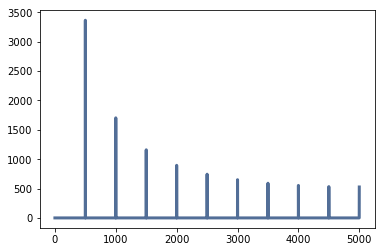

In [19]:
magnitude = np.absolute(hs)
thinkplot.plot(fs, magnitude)

Plot the phases vs the frequencies.

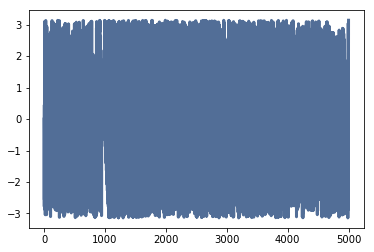

In [20]:
angle = np.angle(hs)
thinkplot.plot(fs, angle)

## What does phase sound like?

Shuffle the phases.

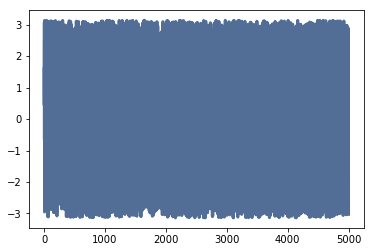

In [21]:
import random
random.shuffle(angle)
thinkplot.plot(fs, angle)

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, we we compute $A e^{i \phi}$

In [22]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

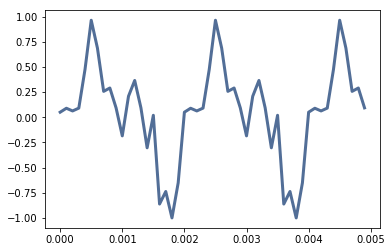

In [23]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()

Play the wave with the shuffled phases.

In [24]:
wave2.make_audio()

For comparison, here's the original wave again.

In [25]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [26]:
def view_harmonics(freq, framerate):
    signal = thinkdsp.SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='blue')
    thinkplot.config(xlabel='frequency', ylabel='amplitude',title='freq:{} ,framerate:{}'.format(freq,framerate))
    
    display(wave.make_audio())

Widget Javascript not detected.  It may not be installed or enabled properly.


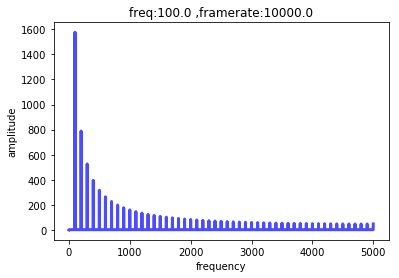

In [28]:
### from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

### Exercises

In [53]:
class SawtoothSignal(thinkdsp.Sinusoid):
    def evaluate(self, ts):
        PI2=2*np.pi
        cycles = self.freq * ts + self.offset/PI2
        frac,_ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [67]:
sawSignal = SawtoothSignal(freq=200)
sawWave =  sawSignal.make_wave()
squareSignal = thinkdsp.SquareSignal(freq=200)
squareWave = squareSignal.make_wave()

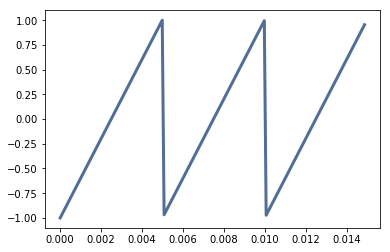

In [71]:
sawSegment = sawWave.segment(duration=sawSignal.period*3)
sawSegment.plot()

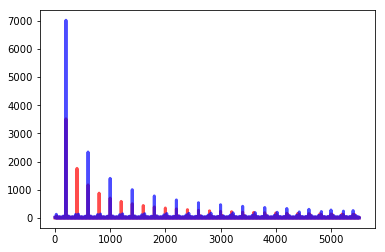

In [74]:
sawSpectrum = sawWave.make_spectrum()
squareSpectrum = squareWave.make_spectrum()
sawSpectrum.plot(color='red')
squareSpectrum.plot(color='blue')

In [73]:
sawWave.make_audio()

It sounds more smooth than square wave

In [78]:
triangleSpectrum = thinkdsp.TriangleSignal(freq=200).make_wave().make_spectrum()

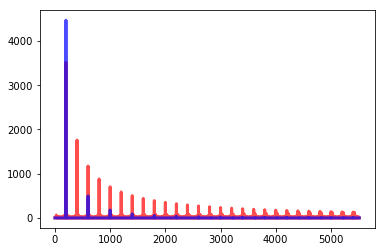

In [79]:
sawSpectrum.plot(color='red')
triangleSpectrum.plot(color='blue')

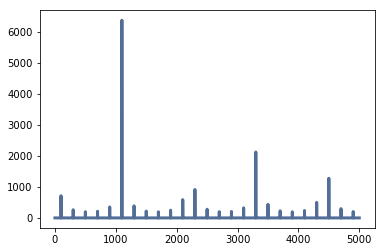

In [123]:
squareSignal = thinkdsp.SquareSignal(freq=1100)
squareWave = squareSignal.make_wave(framerate=10000)
squareSpectrum = squareWave.make_spectrum()

squareSpectrum.plot()

squareWave.make_audio()

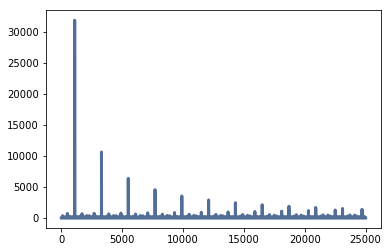

In [124]:
squareSignal = thinkdsp.SquareSignal(freq=1100)
squareWave = squareSignal.make_wave(framerate=50000)
squareSpectrum = squareWave.make_spectrum()

squareSpectrum.plot()

squareWave.make_audio()

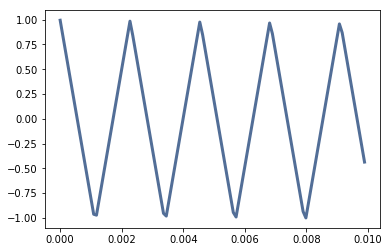

In [115]:
triangleSignal = thinkdsp.TriangleSignal()
triangleWave = triangleSignal.make_wave(duration=0.01)
triangleWave.plot()

In [113]:
triangleSpectrum = triangleWave.make_spectrum()
triangleSpectrum.hs[0]

(1.0436096431476471e-14+0j)

In [90]:
triangleSpectrum.hs[0] = 100

In [91]:
newTriangleWave = triangleSpectrum.make_wave()

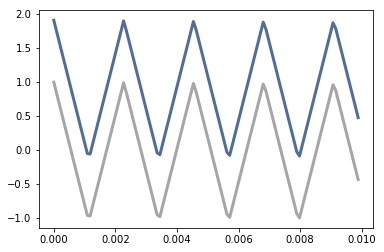

In [93]:
triangleWave.plot(color='gray')
newTriangleWave.plot()

In [107]:
def fDivide(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]

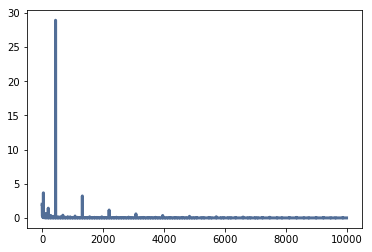

In [139]:
squareSignal = thinkdsp.SquareSignal()
squareWave = squareSignal.make_wave(duration=1,framerate=20000)
squareSpectrum = squareWave.make_spectrum()
fDivide(squareSpectrum)
squareSpectrum.plot()
squareSpectrum.make_wave().make_audio()

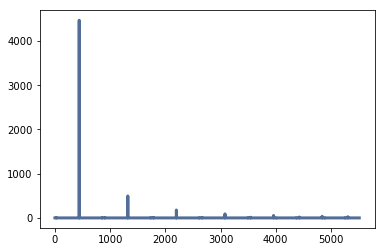

In [142]:
triangleSpectrum = triangleWave.make_spectrum()
triangleSpectrum.plot()

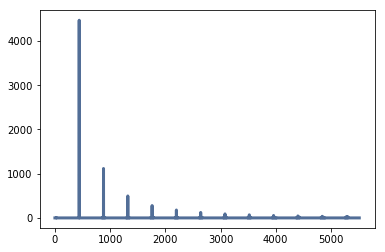

In [198]:
absHs = abs(triangleSpectrum.hs)
indOdd = absHs.argsort()[::-1][:50]
indOdd = indOdd[indOdd<absHs.size-400]
harmonicOdd = triangleSpectrum.hs[indOdd]
indEven = indOdd+triangleSignal.freq
harmonicEven = harmonicOdd * (indOdd / indEven)**2

mod_spectrum = triangleSpectrum.copy()
mod_spectrum.hs[indEven] += harmonicEven
mod_spectrum.plot()

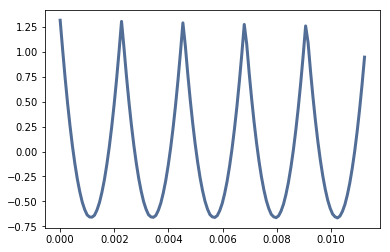

In [203]:
mod_wave = mod_spectrum.make_wave()
mod_segment = mod_wave.segment(duration=triangleSignal.period*5)
mod_segment.plot()
mod_wave.make_audio()

In [206]:
Psignal = thinkdsp.ParabolicSignal()
Pwave = Psignal.make_wave()
Pwave.make_audio()